In [3]:
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_csv('data.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [5]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.208630    7.528922    8.955369
3266 2017-01-16  8.533648    7.890594    9.251511
3267 2017-01-17  8.321065    7.555724    9.032095
3268 2017-01-18  8.153693    7.432184    8.852055
3269 2017-01-19  8.165630    7.382725    8.926316

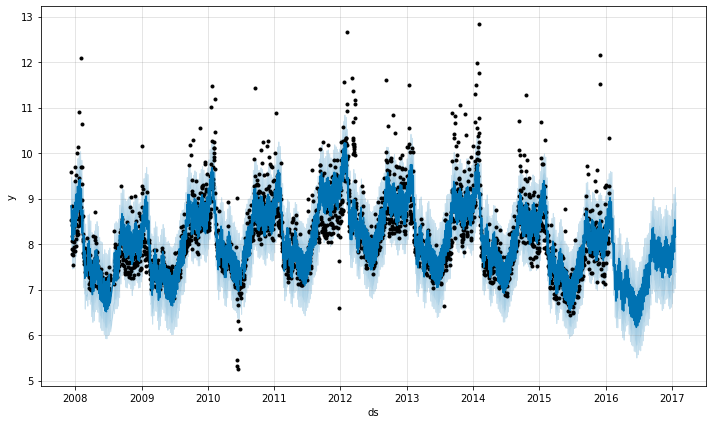

In [8]:
fig1 = m.plot(forecast)

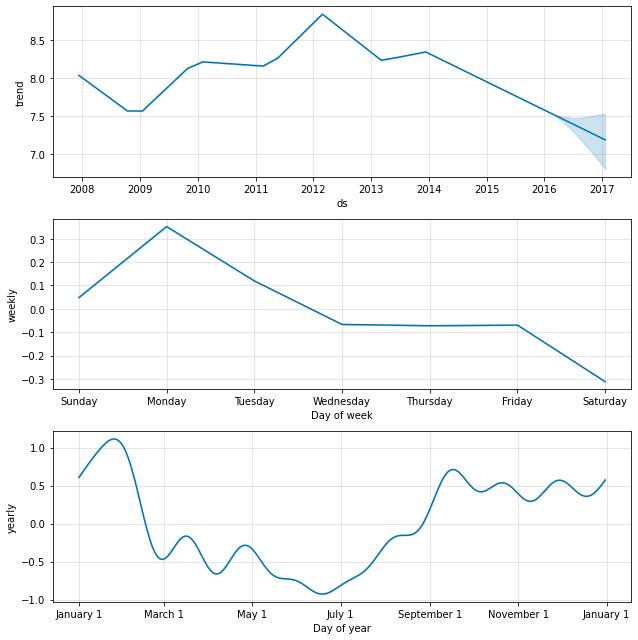

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from fbprophet.plot import plot_plotly, plot_components_plotly

In [11]:
plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)


In [13]:
from fbprophet.diagnostics import cross_validation


In [14]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon= '365 days')

INFO:fbprophet:Making 11 forecasts with cutoffs between 2010-02-15 00:00:00 and 2015-01-20 00:00:00


In [26]:
df.head(760)

ds         y
0    2007-12-10  9.590761
1    2007-12-11  8.519590
2    2007-12-12  8.183677
3    2007-12-13  8.072467
4    2007-12-14  7.893572
..          ...       ...
755  2010-02-13  8.448486
756  2010-02-14  8.266678
757  2010-02-15  8.218518
758  2010-02-16  8.242493
759  2010-02-17  8.008033

[760 rows x 2 columns]

In [30]:
df_cv.groupby(['cutoff']).count()

ds  yhat  yhat_lower  yhat_upper    y
cutoff                                            
2010-02-15  357   357         357         357  357
2010-08-14  365   365         365         365  365
2011-02-10  361   361         361         361  361
2011-08-09  360   360         360         360  360
2012-02-05  364   364         364         364  364
2012-08-03  364   364         364         364  364
2013-01-30  363   363         363         363  363
2013-07-29  364   364         364         364  364
2014-01-25  364   364         364         364  364
2014-07-24  363   363         363         363  363
2015-01-20  363   363         363         363  363

In [33]:
df_cv.head(360)

ds       yhat  yhat_lower  yhat_upper         y     cutoff
0   2010-02-16   8.954694    8.415891    9.407529  8.242493 2010-02-15
1   2010-02-17   8.721064    8.218330    9.240712  8.008033 2010-02-15
2   2010-02-18   8.604730    8.129064    9.121049  8.045268 2010-02-15
3   2010-02-19   8.526543    8.003068    9.020220  7.928766 2010-02-15
4   2010-02-20   8.268414    7.808049    8.785509  7.745003 2010-02-15
..         ...        ...         ...         ...       ...        ...
355 2011-02-14  10.529426   10.005696   11.064974  8.024862 2010-02-15
356 2011-02-15  10.230143    9.641703   10.767473  7.971431 2010-02-15
357 2010-08-15   7.760417    7.227764    8.273120  8.307706 2010-08-14
358 2010-08-16   8.016862    7.487273    8.493122  8.280711 2010-08-14
359 2010-08-17   7.838947    7.322335    8.356840  8.744488 2010-08-14

[360 rows x 6 columns]

In [34]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

In [35]:
df_cv2.head()

ds      yhat  yhat_lower  yhat_upper         y     cutoff
0 2013-02-16  8.027480    7.415466    8.593806  7.817625 2013-02-15
1 2013-02-17  8.327710    7.681436    8.975973  7.822845 2013-02-15
2 2013-02-18  8.501919    7.889360    9.133955  7.967280 2013-02-15
3 2013-02-19  8.216768    7.586325    8.799614  8.006701 2013-02-15
4 2013-02-20  7.970141    7.368581    8.558359  7.911324 2013-02-15

In [38]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

horizon       mse      rmse       mae      mape     mdape  coverage
324 361 days  1.119252  1.057947  0.857551  0.102810  0.087224  0.489493
325 362 days  1.134672  1.065210  0.864200  0.103413  0.087720  0.490178
326 363 days  1.155966  1.075159  0.871703  0.104175  0.088177  0.486980
327 364 days  1.172290  1.082723  0.879306  0.105101  0.089167  0.481270
328 365 days  1.184865  1.088515  0.888204  0.106131  0.089370  0.473732

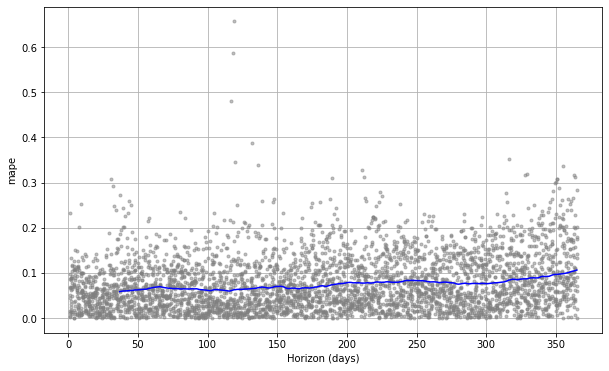

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


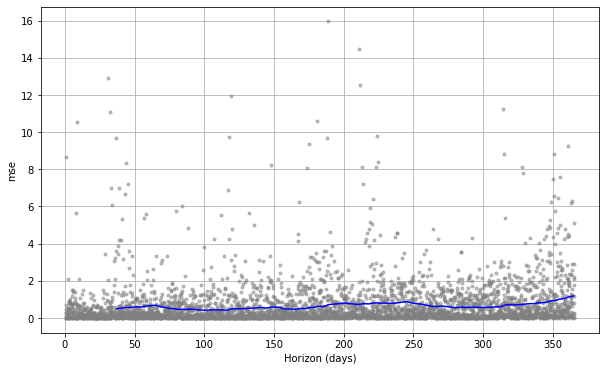

In [42]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

In [43]:
import itertools
import numpy as np
import pandas as pd

In [44]:
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

In [45]:
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

In [46]:
all_params

[{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.1},
 {'changepoint_prior_scale': 0.5, 'seasonal

In [47]:
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000011788A0D400>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000011788A02220>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000011786D38EE0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x00000117884C9BE0>
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet

In [53]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

changepoint_prior_scale  seasonality_prior_scale
0                     0.001                     0.01
1                     0.001                     0.10
2                     0.001                     1.00
3                     0.001                    10.00
4                     0.010                     0.01
5                     0.010                     0.10
6                     0.010                     1.00
7                     0.010                    10.00
8                     0.100                     0.01
9                     0.100                     0.10
10                    0.100                     1.00
11                    0.100                    10.00
12                    0.500                     0.01
13                    0.500                     0.10
14                    0.500                     1.00
15                    0.500                    10.00

In [54]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}
